# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [377]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [378]:
df = pd.read_csv("motorbike_ambulance_calls.csv")
df.head()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB


In [380]:
df.drop_duplicates()

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/11,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,1/1/11,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,1/1/11,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,1/1/11,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,1/1/11,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/12,spring,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,12/31/12,spring,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,12/31/12,spring,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,12/31/12,spring,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [381]:
df.isnull().sum()

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [382]:
df.describe()

,index,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,5017.0295,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8690.0000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,13034.5000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.0000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [383]:
df.shape

(17379, 15)

1. we can see that our data dont have a null value that is great
2. shape of our dataframe is (17379, 15)
3. in column 'data' and 'season' dont match becouse we see that  here winter days count for spring. other 'season' have the same problem
4. 'atemp' is a column that dosnt make sense in our analys so we need to delete it in next steps

In [384]:
df = df.drop(['atemp'], axis=1)

In [385]:
df['date'] = pd.to_datetime(df['date'])

turn a column 'date' in datetype

In [386]:
df['season'] = df['season'].replace({"winter":0,'spring':1,'summer':2,"automn":3})
df['season'] = df['mnth'].apply(lambda x: 1 if 3 <= x <= 5 else (2 if 6 <= x <= 8 else (3 if 9 <= x <= 11 else 0)))


In [387]:
df.sample(10)

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
8978,8979,2012-01-14,0,1,1,23,0,6,0,1,0.16,0.47,0.2239,76
9198,9199,2012-01-24,0,1,1,4,0,2,1,2,0.30,1.00,0.0896,2
7136,7137,2011-10-29,3,0,10,23,0,6,0,1,0.22,0.87,0.1940,36
5441,5442,2011-08-19,2,0,8,15,0,5,1,1,0.80,0.49,0.1045,222
13105,13106,2012-07-05,2,1,7,6,0,4,1,1,0.72,0.58,0.0000,133
16495,16496,2012-11-25,3,1,11,1,0,0,0,1,0.22,0.44,0.1940,36
3461,3462,2011-05-29,1,0,5,3,0,0,0,1,0.62,0.88,0.1045,26
13025,13026,2012-07-01,2,1,7,22,0,0,0,1,0.82,0.43,0.1343,151
819,820,2011-02-06,0,0,2,14,0,0,0,1,0.34,0.46,0.0896,161
16098,16099,2012-11-08,3,1,11,12,0,4,1,1,0.40,0.24,0.4925,235


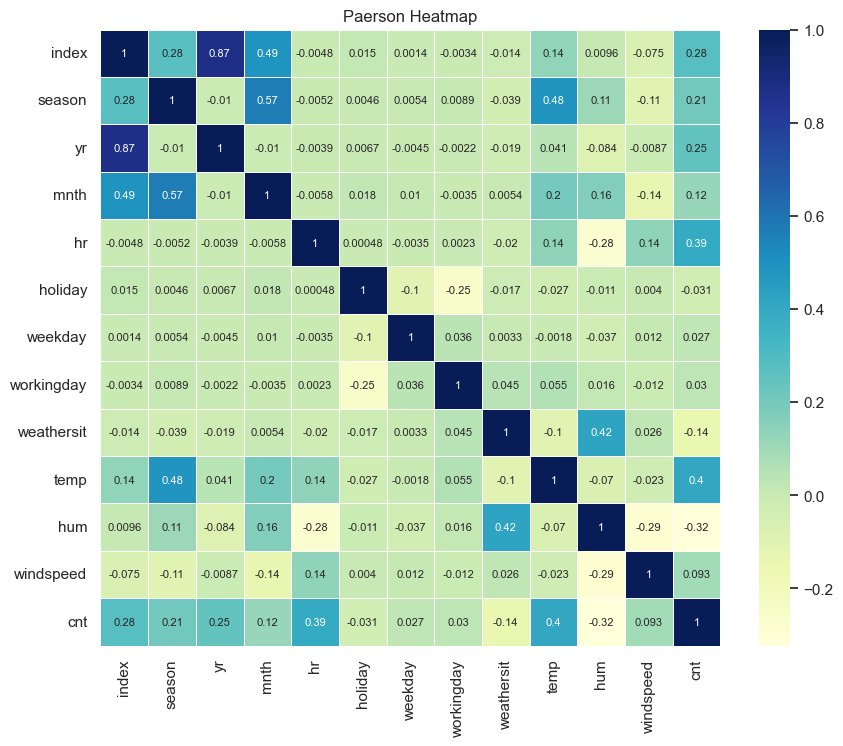

In [388]:
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu',  linewidths=0.5, 
            annot_kws={"size": 8})
plt.title("Paerson Heatmap")
plt.show()

The heat map shows a high correlation between the variables ```'hr'``` and ```'cnt'```, which indicates the dependence of the number of calls on the hour of the day. In addition, there is a relationship between 'cnt' and temperature and humidity, highlighting the influence of weather conditions on emergency calls.

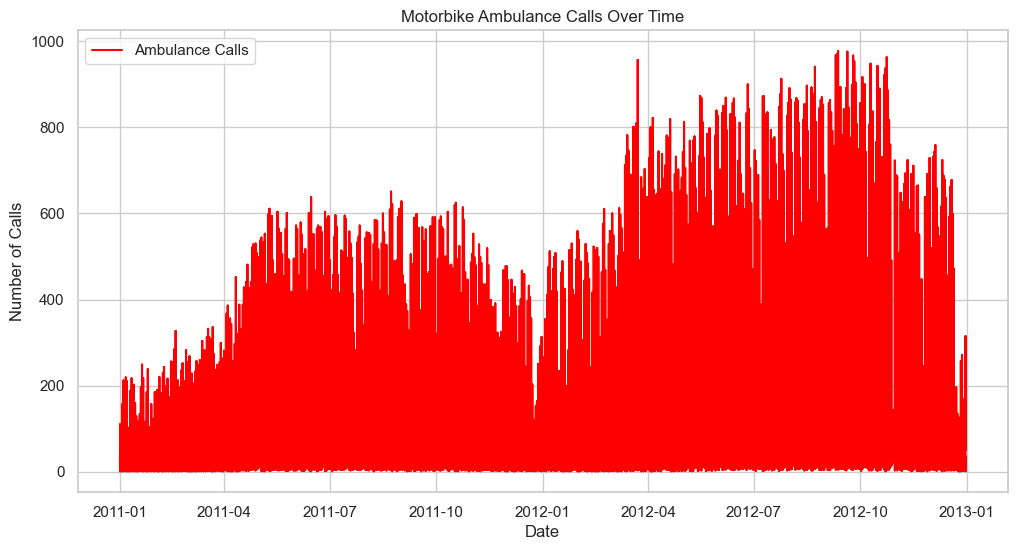

In [389]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['cnt'], label='Ambulance Calls', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.title('Motorbike Ambulance Calls Over Time')
plt.grid(True)
plt.legend()
plt.show()

[Text(-200.0, 0, '−200'),
 Text(0.0, 0, '0'),
 Text(200.0, 0, '200'),
 Text(400.0, 0, '400'),
 Text(600.0, 0, '600'),
 Text(800.0, 0, '800'),
 Text(1000.0, 0, '1000'),
 Text(1200.0, 0, '1200')]

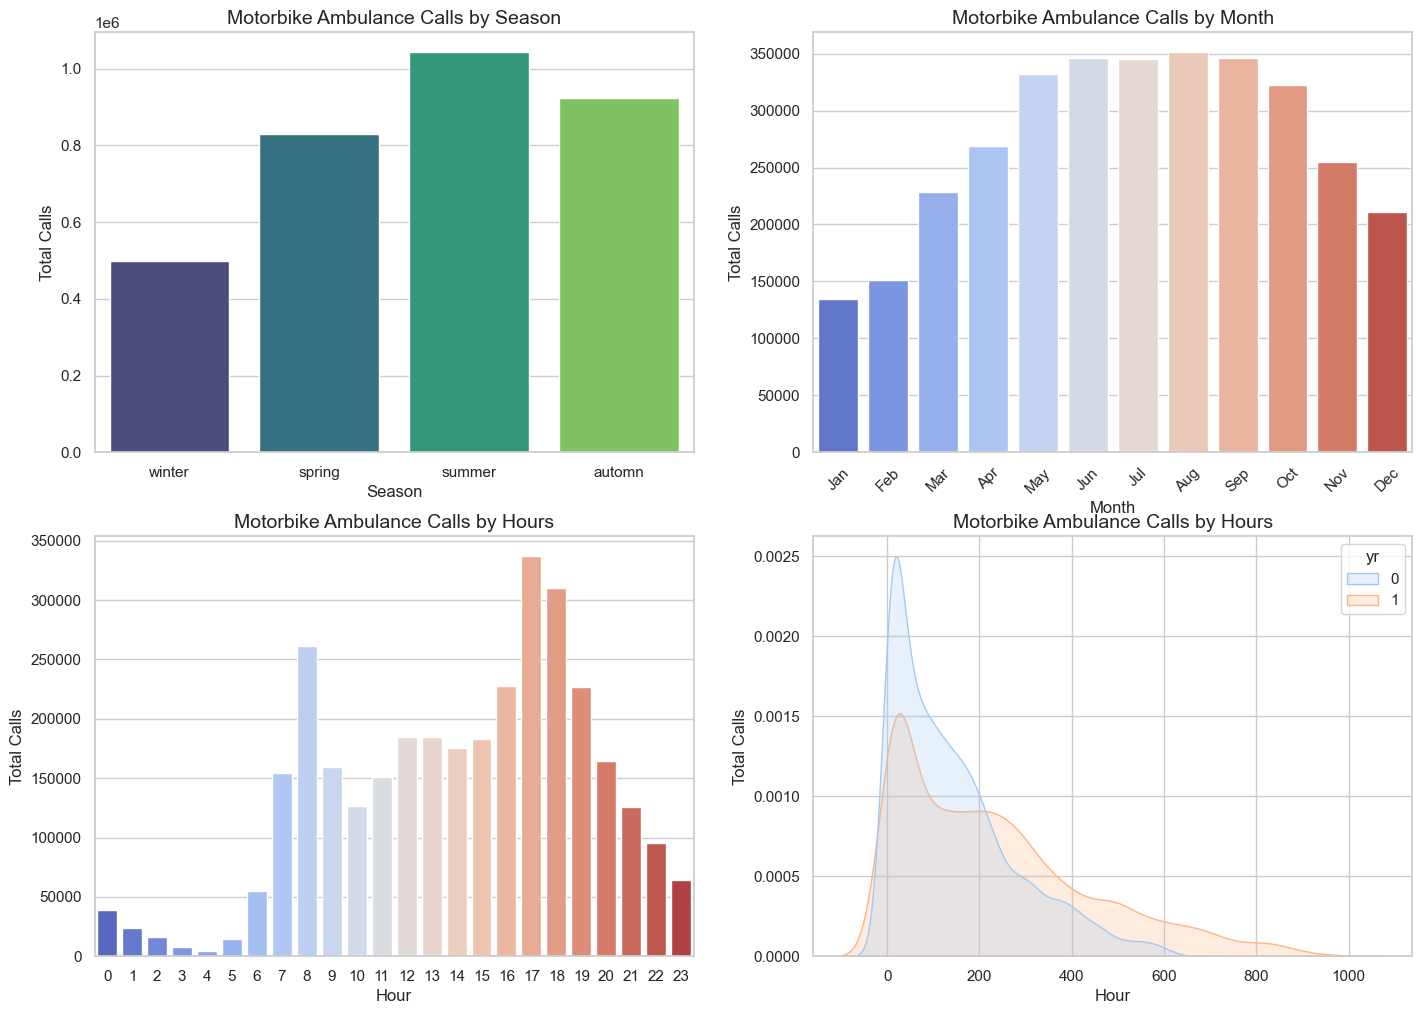

In [390]:
fig, ax = plt.subplots(2, 2,figsize=(17,12))

season_counts = df.groupby('season')['cnt'].sum().reset_index()
sns.barplot(x='season', y='cnt', data=season_counts, palette='viridis', ax=ax[0][0])
ax[0][0].set_title('Motorbike Ambulance Calls by Season', fontsize=14)
ax[0][0].set_xlabel('Season', fontsize=12)
ax[0][0].set_ylabel('Total Calls', fontsize=12)
ax[0][0].set_xticklabels(["winter","spring", "summer","automn"], rotation=0)

month_counts = df.groupby('mnth')['cnt'].sum().reset_index()
sns.barplot(x='mnth', y='cnt', data=month_counts, palette='coolwarm', ax=ax[0][1])
ax[0][1].set_title('Motorbike Ambulance Calls by Month', fontsize=14)
ax[0][1].set_xlabel('Month', fontsize=12)
ax[0][1].set_ylabel('Total Calls', fontsize=12)
ax[0][1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

hr_counts = df.groupby('hr')['cnt'].sum().reset_index()
sns.barplot(x='hr', y='cnt', data=hr_counts, palette='coolwarm', ax=ax[1][0])
ax[1][0].set_title('Motorbike Ambulance Calls by Hours', fontsize=14)
ax[1][0].set_xlabel('Hour', fontsize=12)
ax[1][0].set_ylabel('Total Calls', fontsize=12)
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(), rotation=0)

hr_counts = df.groupby('hr')['cnt'].sum().reset_index()
sns.kdeplot(data=df, x='cnt', hue='yr', palette='pastel', fill=True, ax=ax[1,1])
ax[1][1].set_title('Motorbike Ambulance Calls by Hours', fontsize=14)
ax[1][1].set_xlabel('Hour', fontsize=12)
ax[1][1].set_ylabel('Total Calls', fontsize=12)
ax[1][1].set_xticklabels(ax[1][1].get_xticklabels(), rotation=0)


In [391]:
data_numerical = df.loc[:, ["temp", "hum", "windspeed"]]
data_numerical

,temp,hum,windspeed
0,0.24,0.81,0.0000
1,0.22,0.80,0.0000
2,0.22,0.80,0.0000
3,0.24,0.75,0.0000
4,0.24,0.75,0.0000
...,...,...,...
17374,0.26,0.60,0.1642
17375,0.26,0.60,0.1642
17376,0.26,0.60,0.1642
17377,0.26,0.56,0.1343


Separated numerical variables into a separate dataset: 'temp', 'hum', 'windspeed',

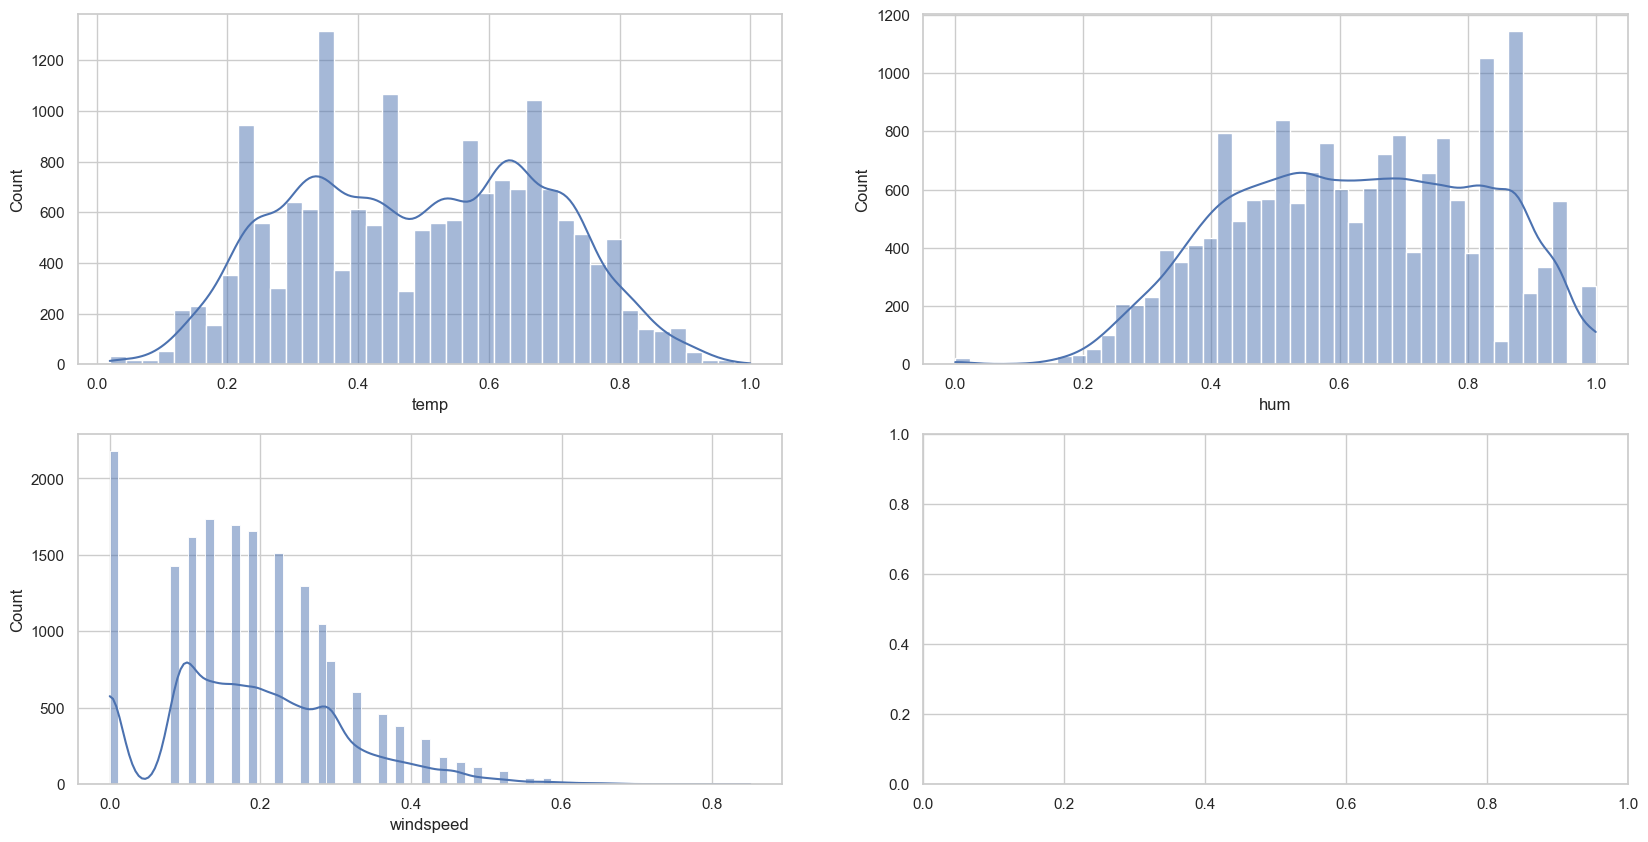

In [392]:
_, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.histplot(data=data_numerical, x=variable, ax=subplot, palette='pastel6', kde=True)

Plotted histograms of the distribution and found that ```'temp'``` displays a bimodal type of distribution, \
the ```'hum'``` plot shows a uniform distribution as most of the data is concentrated in roughly one range, and \
the ```'windspeed'``` plot reproduces a geometric distribution.

The skew coefficient: 1.2773013463494975


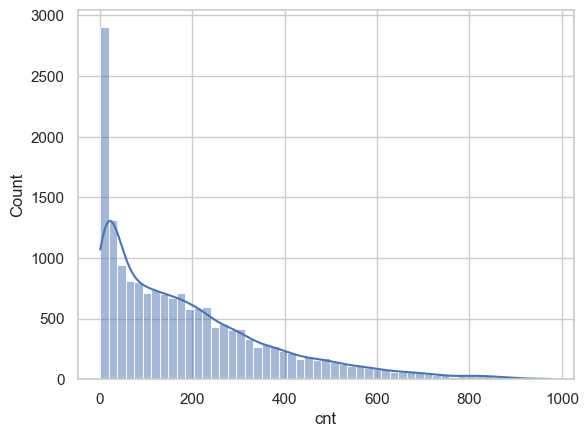

In [393]:
from scipy.stats import skew

sns.histplot(df,x='cnt',palette='magma', kde=True)
skewness = skew(df['cnt'])
print("The skew coefficient:", skewness)

The target variable ```'cnt'``` also has a geometric distribution and a skew of ```1.27```, indicating a right-skewed distribution. In addition, the distribution has a large tail, so it can be considered heavy.

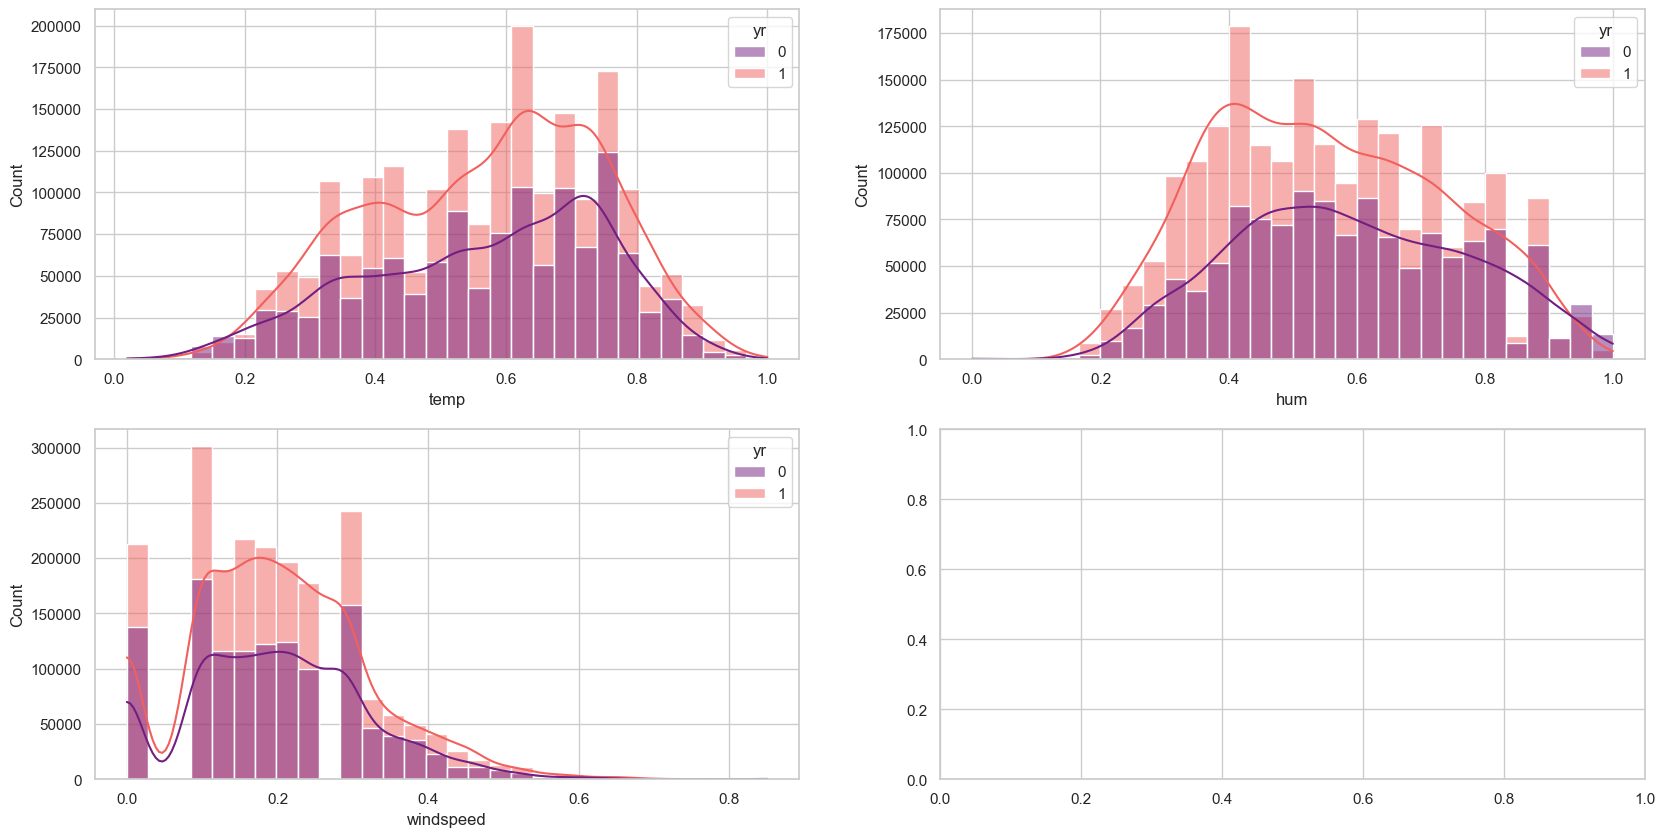

In [394]:
_, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.histplot(data=data_numerical, x=variable, ax=subplot, hue=df["yr"], weights=df["cnt"], palette='magma', kde=True, bins=30, alpha=0.5)

These plots show us ambulance calls depending on ```'temp'```, ```'hum'``` and ```'windspeed'``` in two years. We can see that ```'temp'``` distribution looks kinda like Normal Distribution. And ```'hum'``` also is Normal Distribution. But, for the ```'windspeed'``` we see large drop at the beginning and than a large tail to the right. The ```'windspeed'``` feature looks the most interesting for us.

## Anomaly detection

In [395]:
df["cnt"].max()

977

In [396]:
df.loc[df['cnt'].idxmax()].to_frame().T

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
14773,14774,2012-09-12 00:00:00,3,1,9,18,0,3,1,1,0.66,0.44,0.2537,977


In [397]:
df["cnt"].to_frame().describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17379.0,189.463088,181.387599,1.0,40.0,142.0,281.0,977.0


In [398]:
quantiles = [0.01, 0.10, 0.15, 0.20, 0.25, 0.30, 0.45, 0.50, 0.75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.99, 1]

for i in quantiles:
    print(f"{i * 100}% quantile of cnt is: ", round(df["cnt"].quantile(i), 2))

1.0% quantile of cnt is:  2.0
10.0% quantile of cnt is:  9.0
15.0% quantile of cnt is:  16.0
20.0% quantile of cnt is:  27.0
25.0% quantile of cnt is:  40.0
30.0% quantile of cnt is:  58.0
45.0% quantile of cnt is:  120.0
50.0% quantile of cnt is:  142.0
75.0% quantile of cnt is:  281.0
80.0% quantile of cnt is:  321.0
85.0% quantile of cnt is:  376.0
90.0% quantile of cnt is:  451.2
95.0% quantile of cnt is:  563.1
97.0% quantile of cnt is:  638.0
99.0% quantile of cnt is:  782.22
100% quantile of cnt is:  977.0


In [399]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


# Model Training

### IsolationForest

In [400]:
X_train = df[["cnt"]].values

In [401]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

y_pred_lof = lof.fit_predict(X_train)

y_pred_lof = np.where(y_pred_lof == -1)[0]

In [402]:
isol_forest = IsolationForest(contamination=0.01, random_state=42)

y_pred_iso = isol_forest.fit_predict(X_train)

y_pred_iso = np.where(y_pred_iso == -1)[0]

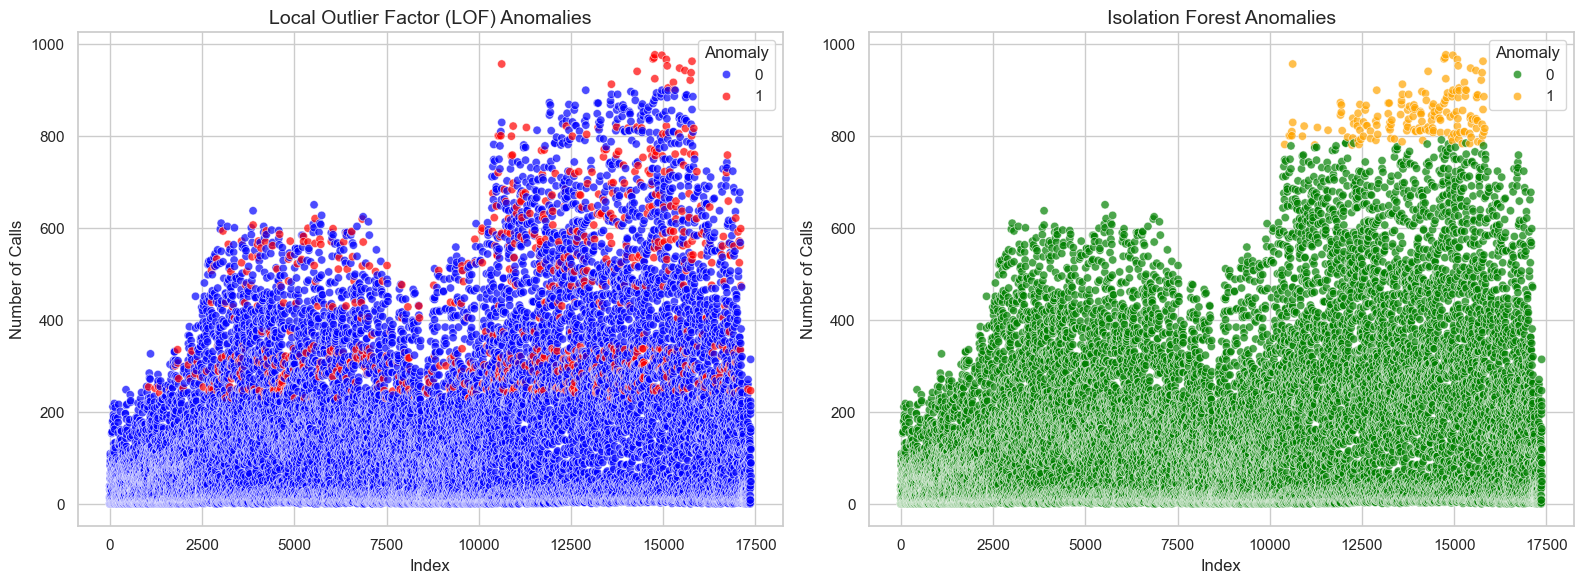

In [403]:
df['lof_anomaly'] = 0
df.loc[y_pred_lof, 'lof_anomaly'] = 1 

df['iso_anomaly'] = 0
df.loc[y_pred_iso, 'iso_anomaly'] = 1 

sns.set(style='whitegrid')

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(
    x=np.arange(len(df)), y=df['cnt'],
    hue=df['lof_anomaly'], 
    palette={0: 'blue', 1: 'red'}, 
    ax=ax[0], alpha=0.7
)
ax[0].set_title('Local Outlier Factor (LOF) Anomalies', fontsize=14)
ax[0].set_xlabel('Index', fontsize=12)
ax[0].set_ylabel('Number of Calls', fontsize=12)
ax[0].legend(title='Anomaly', loc='upper right')

# Isolation Forest
sns.scatterplot(
    x=np.arange(len(df)), y=df['cnt'], 
    hue=df['iso_anomaly'], 
    palette={0: 'green', 1: 'orange'}, 
    ax=ax[1], alpha=0.7
)
ax[1].set_title('Isolation Forest Anomalies', fontsize=14)
ax[1].set_xlabel('Index', fontsize=12)
ax[1].set_ylabel('Number of Calls', fontsize=12)
ax[1].legend(title='Anomaly', loc='upper right')

plt.tight_layout()
plt.show()


After training our models on Local Outlier Factor (LOF) and Isolation Forest, we can see interesting results. Isolation Forest did a better job because it precisely identified the most extreme outliers at the peak values, focusing on the most critical anomalies. LOF, while finding outliers across a wider range, seemed less targeted and included some less significant deviations. Therefore, I will focus more on the results from Isolation Forest, as it aligns better with my expectation

In [404]:
anomalies = df.iloc[y_pred_iso]
anomalies

,index,date,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,lof_anomaly,iso_anomaly
10406,10407,2012-03-14,1,1,3,17,0,3,1,1,0.70,0.28,0.0896,782,0,1
10527,10528,2012-03-19,1,1,3,18,0,1,1,1,0.64,0.57,0.2537,801,1,1
10551,10552,2012-03-20,1,1,3,18,0,2,1,1,0.60,0.69,0.2537,801,1,1
10598,10599,2012-03-22,1,1,3,17,0,4,1,1,0.66,0.65,0.1642,810,0,1
10599,10600,2012-03-22,1,1,3,18,0,4,1,1,0.66,0.65,0.1642,801,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15780,15781,2012-10-24,3,1,10,17,0,3,1,1,0.66,0.47,0.0000,963,1,1
15781,15782,2012-10-24,3,1,10,18,0,3,1,1,0.66,0.44,0.0000,858,0,1
15804,15805,2012-10-25,3,1,10,17,0,4,1,1,0.60,0.69,0.1642,886,0,1
15805,15806,2012-10-25,3,1,10,18,0,4,1,1,0.56,0.83,0.1045,809,0,1


## Regression

14:58:25 - cmdstanpy - INFO - Chain [1] start processing
14:58:27 - cmdstanpy - INFO - Chain [1] done processing


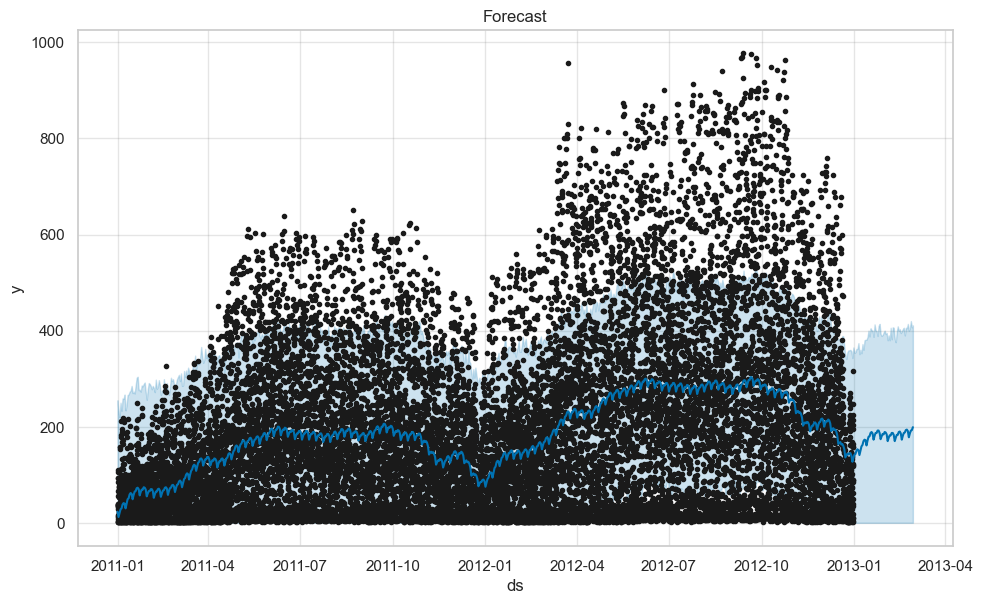

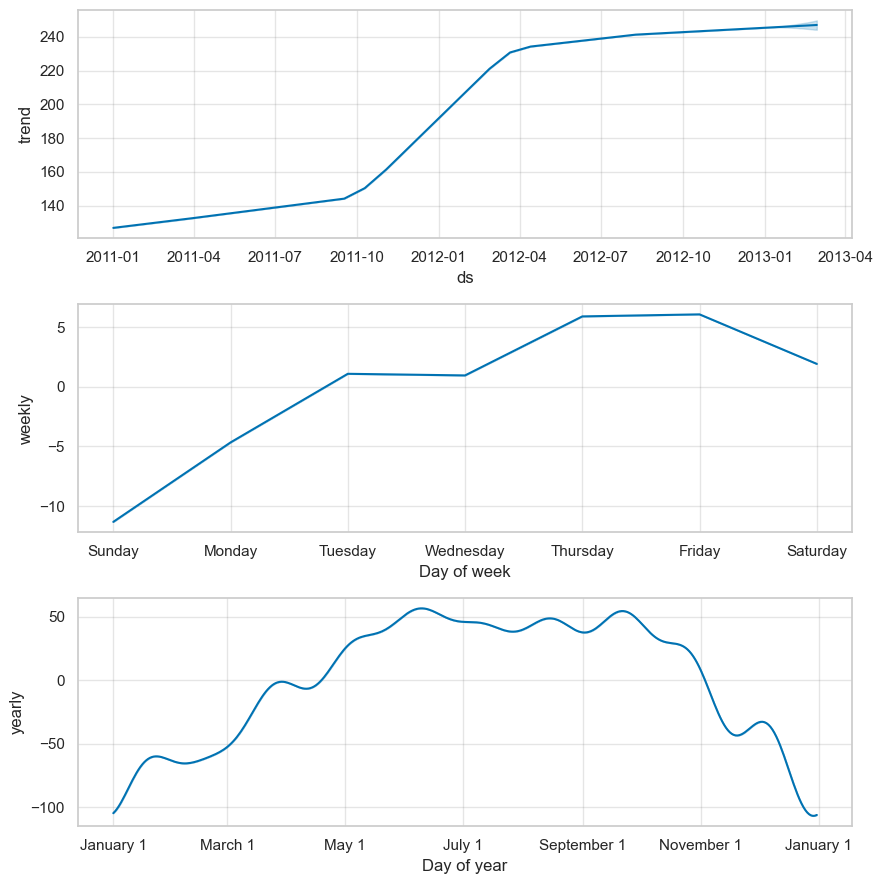

            ds  yhat  yhat_lower  yhat_upper
0   2011-01-01    23           0         255
1   2011-01-02    12           0         231
2   2011-01-03    20           0         220
3   2011-01-04    28           0         250
4   2011-01-05    30           0         233
..         ...   ...         ...         ...
785 2013-02-24   178           0         400
786 2013-02-25   186           0         405
787 2013-02-26   192           0         420
788 2013-02-27   193           0         407
789 2013-02-28   199           0         411

[790 rows x 4 columns]


In [ ]:
from prophet import Prophet


df_prophet = df[['date', 'cnt']].rename(columns={'date': 'ds', 'cnt': 'y'})

model = Prophet()

model.fit(df_prophet)

future = model.make_future_dataframe(periods=59)

forecast = model.predict(future)

forecast['yhat'] = forecast['yhat'].apply(lambda x: max(0, round(x)))
forecast['yhat_lower'] = forecast['yhat_lower'].apply(lambda x: max(0, round(x)))
forecast['yhat_upper'] = forecast['yhat_upper'].apply(lambda x: max(0, round(x)))

model.plot(forecast)
plt.title('Forecast')
plt.show()

model.plot_components(forecast)
plt.show()

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


Wa have made future prediction for 59 days and we got good results.Based on the results from the Prophet model, the time series forecast aligns well with the observed data trends, capturing the underlying seasonality and growth. The predictions for the cnt variable, ranging from lower to upper confidence bounds, provide a realistic range of expected values.

# GradientBoosting

In [406]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [407]:
df = df.drop('date', axis=1)
X = df.drop('cnt', axis=1)
y = df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 150],  
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5], 
    'subsample': [1.0],  
    'min_samples_split': [2, 5], 
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5, 
    n_jobs=-1, 
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150, 'subsample': 1.0}


In [408]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test data: {mse}")
r2s = r2_score(y_test, y_pred)
print(f"R2 Score on test data: {r2s:.3f}")

Mean Squared Error on test data: 1792.185324500504
R2 Score on test data: 0.943


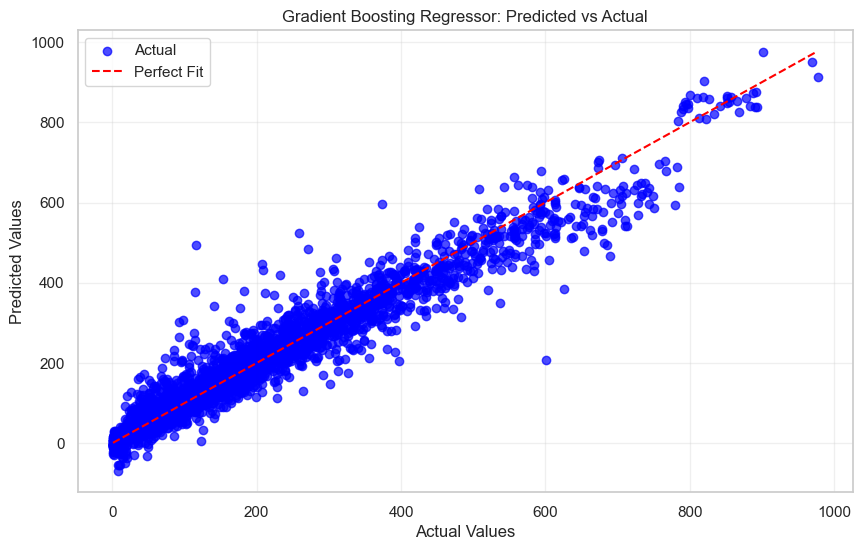

In [410]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Gradient Boosting Regressor: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The results of the Gradient Boosting Regression model demonstrate strong predictive performance. After performing a grid search with cross-validation over 16 parameter combinations, the best parameters were identified as a learning rate of 0.1, a maximum tree depth of 5, 150 estimators, a minimum sample split of 2, and a subsample fraction of 1.0. The model achieved a mean squared error (MSE) of 1791.1 on the test data, indicating relatively low prediction error. Furthermore, the R² score of 0.9434 suggests that the model explains over 94% of the variance in the target variable. This high R² value highlights the effectiveness of the Gradient Boosting model for this dataset. The chosen hyperparameters strike a good balance between model complexity and generalization. Overall, the model is well-tuned and provides reliable predictions. 

In our plot we see our model is well trained according to real data